In [72]:
___Author___='LumberJack Jyss'

In [73]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [74]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
print('Librairies imported')

Importing librairies...
Librairies imported


In [75]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [76]:
start = '2017-02-16'
end = '2019-05-28'

In [77]:
vix = pd.read_csv('VXX.USUSD_Candlestick_1_D_BID_16.02.2017-28.05.2019.csv')

In [78]:
df = pd.read_csv('GBPUSD_Candlestick_1_D_BID_16.02.2017-28.05.2019.csv')

In [79]:
df = df.drop(['Volume'],axis=1)

In [80]:
for i in range(0,vix.shape[0]):
    if vix.iloc[i,0]!= df.iloc[i,0]:
        print('Vix :', vix.iloc[i,0],' spy : ', df.iloc[i,0])
        print('Index Vix:', vix.index[i],' index GBP/USD :',df.index[i])
        df = df.drop([i],axis=0)

Vix : 20.02.2017 23:00:00.000 GMT+0100  spy :  19.02.2017 23:00:00.000 GMT+0100
Index Vix: 2  index GBP/USD : 2
Vix : 16.04.2017 23:00:00.000 GMT+0200  spy :  13.04.2017 23:00:00.000 GMT+0200
Index Vix: 40  index GBP/USD : 41
Vix : 29.05.2017 23:00:00.000 GMT+0200  spy :  28.05.2017 23:00:00.000 GMT+0200
Index Vix: 70  index GBP/USD : 72
Vix : 04.07.2017 23:00:00.000 GMT+0200  spy :  03.07.2017 23:00:00.000 GMT+0200
Index Vix: 95  index GBP/USD : 98
Vix : 04.09.2017 23:00:00.000 GMT+0200  spy :  03.09.2017 23:00:00.000 GMT+0200
Index Vix: 138  index GBP/USD : 142
Vix : 23.11.2017 23:00:00.000 GMT+0100  spy :  22.11.2017 23:00:00.000 GMT+0100
Index Vix: 195  index GBP/USD : 200
Vix : 25.12.2017 23:00:00.000 GMT+0100  spy :  24.12.2017 23:00:00.000 GMT+0100
Index Vix: 216  index GBP/USD : 222
Vix : 15.01.2018 23:00:00.000 GMT+0100  spy :  14.01.2018 23:00:00.000 GMT+0100
Index Vix: 229  index GBP/USD : 236
Vix : 19.02.2018 23:00:00.000 GMT+0100  spy :  18.02.2018 23:00:00.000 GMT+0100
In

df = pd.DataFrame()
df['Date'] = gbpusd.index
df['High'] = gbpusd['High']
df['Low'] = gbpusd['Low']
df['Open'] = gbpusd['Open']
df['Close'] = gbpusd['Close']
#df['Volume'] = gbpusd['volume']
#df['Adj Close'] = gbpusd['adjclose']

In [81]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  559
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  447  jours 
Bloc 2 : 112  jours


In [82]:
date = vix['Local time']

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 591
Data columns (total 5 columns):
Local time    559 non-null object
Open          559 non-null float64
High          559 non-null float64
Low           559 non-null float64
Close         559 non-null float64
dtypes: float64(4), object(1)
memory usage: 26.2+ KB


temp = pd.DataFrame()
temp = vix.iloc[:,-1]
temp.reset_index(inplace=True,drop=True)

In [84]:
dataset = df.copy()
dataset['Vix_Close'] = vix['Close']


In [85]:
dataset.head()

,Local time,Open,High,Low,Close,Vix_Close
0,15.02.2017 23:00:00.000 GMT+0100,1.24564,1.25234,1.24539,1.24887,17.506
1,16.02.2017 23:00:00.000 GMT+0100,1.24882,1.25107,1.23878,1.24069,17.535
3,20.02.2017 23:00:00.000 GMT+0100,1.24579,1.24806,1.24015,1.24730,17.817
4,21.02.2017 23:00:00.000 GMT+0100,1.24724,1.25077,1.24195,1.24419,18.266
5,22.02.2017 23:00:00.000 GMT+0100,1.24439,1.25612,1.24273,1.25561,18.066


In [86]:
temp = dataset.copy()
dataset = pd.DataFrame()
dataset['Date'] = date
dataset['Open'] = temp['Open']
dataset['Vix'] = temp['Vix_Close'].shift(1)
dataset['Spy_Target'] = temp['Close']
dataset = dataset.dropna()
dataset.reset_index(inplace=True,drop=True)

In [87]:
dataset.head()

,Date,Open,Vix,Spy_Target
0,16.02.2017 23:00:00.000 GMT+0100,1.24882,17.506,1.24069
1,21.02.2017 23:00:00.000 GMT+0100,1.24579,17.535,1.24730
2,22.02.2017 23:00:00.000 GMT+0100,1.24724,17.817,1.24419
3,23.02.2017 23:00:00.000 GMT+0100,1.24439,18.266,1.25561
4,26.02.2017 23:00:00.000 GMT+0100,1.25561,18.066,1.24561


In [88]:
# convert into input/output
X1 = dataset['Open'].values.reshape(len(dataset),1)
X2 = dataset['Vix'].values.reshape(len(dataset),1)
y = dataset['Spy_Target'].values.reshape(len(dataset),1)

#scaler = MinMaxScaler()
#X1 = scaler.fit_transform(X1)
#X2 = scaler.fit_transform(X2)

X1_train = X1[:-bloc2]
X1_test = X1[-bloc2:]

X2_train = X2[:-bloc2]
X2_test = X2[-bloc2:]

y_train = y[:-bloc2]
y_test = y[-bloc2:]


In [89]:
X_train = np.concatenate((X1_train,X2_train),axis=1)
X_test = np.concatenate((X1_test,X2_test),axis=1)

In [90]:
# first input model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=2))
#model.add(Dense(30, activation='relu', input_dim=2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [91]:
# fit model
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=250, verbose=1,shuffle=True,validation_split=.2)

Train on 330 samples, validate on 83 samples
Epoch 1/250
330/330 [==============================] - 0s 567us/step - loss: 57.5546 - val_loss: 30.9301
Epoch 2/250
330/330 [==============================] - 0s 44us/step - loss: 20.6538 - val_loss: 7.9190
Epoch 3/250
330/330 [==============================] - 0s 36us/step - loss: 4.4157 - val_loss: 0.7089
Epoch 4/250
330/330 [==============================] - 0s 36us/step - loss: 0.4667 - val_loss: 0.0844
Epoch 5/250
330/330 [==============================] - 0s 34us/step - loss: 0.3716 - val_loss: 0.3227
Epoch 6/250
330/330 [==============================] - 0s 38us/step - loss: 0.4204 - val_loss: 0.1819
Epoch 7/250
330/330 [==============================] - 0s 39us/step - loss: 0.2829 - val_loss: 0.0458
Epoch 8/250
330/330 [==============================] - 0s 38us/step - loss: 0.2280 - val_loss: 0.0158
Epoch 9/250
330/330 [==============================] - 0s 38us/step - loss: 0.2226 - val_loss: 0.0150
Epoch 10/250
330/330 [===========

In [92]:
model.test_on_batch(X_test, y_test)
model.metrics_names

['loss']

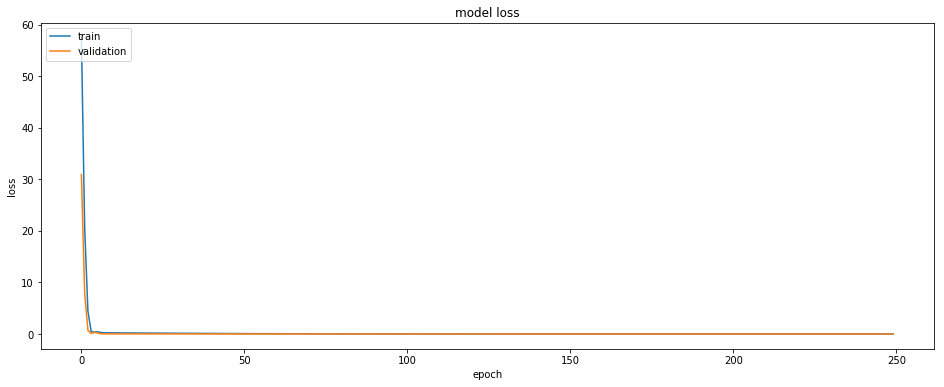

In [93]:
plt.figure(figsize=(16,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [94]:
model.save('GBPUSD.h5')

In [95]:
dataset.tail()

,Date,Open,Vix,Spy_Target
520,19.05.2019 23:00:00.000 GMT+0200,1.31518,28.468,1.30729
521,20.05.2019 23:00:00.000 GMT+0200,1.30729,28.878,1.30338
522,21.05.2019 23:00:00.000 GMT+0200,1.30337,27.502,1.30551
523,22.05.2019 23:00:00.000 GMT+0200,1.30536,27.158,1.30479
524,23.05.2019 23:00:00.000 GMT+0200,1.30414,28.977,1.30851


In [96]:
# demonstrate prediction
x_input = np.array([[df.iloc[-1,1],vix.iloc[-1,2]]])
yhat = model.predict(x_input, verbose=1)
print(yhat,'versus', dataset.iloc[-1,-1])
error = ((df.iloc[-1,-1] - yhat)/df.iloc[-1,-1])*100
print('Error : ',abs(error[0][0]),'%')

1/1 [==============================] - 0s 29ms/step
[[1.287693]] versus 1.30851
Error :  1.7738041 %


In [97]:
print('Initializing \b Processing')
yhat = model.predict(X_test, verbose=1)
print('All processed')

Initializing Processing
112/112 [==============================] - 0s 27us/step
All processed


In [98]:
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  559
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  447  jours 
Bloc 2 : 112  jours


In [99]:
#date.reset_index(inplace=True,drop=True)
resultats = pd.DataFrame()
resultats['Date'] = vix['Local time']
resultats = resultats.iloc[-bloc2:]
resultats.reset_index(inplace=True,drop=True)

In [100]:
resultats.head()

,Date
0,25.11.2018 23:00:00.000 GMT+0100
1,26.11.2018 23:00:00.000 GMT+0100
2,27.11.2018 23:00:00.000 GMT+0100
3,28.11.2018 23:00:00.000 GMT+0100
4,29.11.2018 23:00:00.000 GMT+0100


In [101]:
pred = pd.DataFrame()
pred['Open'] = dataset.iloc[-bloc2:,1]
pred['Vix'] = dataset.iloc[-bloc2:,2]
pred['Close'] = dataset.iloc[-bloc2:,3]
pred['Predictions'] = yhat.reshape(bloc2,)
pred.reset_index(inplace=True,drop=True)

In [102]:
pred.head()

,Open,Vix,Close,Predictions
0,1.30857,37.828,1.31425,1.323323
1,1.31412,39.988,1.31880,1.329130
2,1.31880,40.217,1.32311,1.332484
3,1.32311,38.838,1.31516,1.334032
4,1.30854,37.558,1.31514,1.323041


In [103]:
resultats = pd.concat((date,pred),axis=1)
#resultats = resultats.iloc[:bloc2,:]
resultats['% Error'] = ((resultats.iloc[:,3].values-resultats.iloc[:,4])/resultats.iloc[:,3])*100

In [106]:
resultats = resultats.dropna()
resultats.tail()

,Local time,Open,Vix,Close,Predictions,% Error
107,20.07.2017 23:00:00.000 GMT+0200,1.31518,28.468,1.30729,1.318679,-0.871181
108,23.07.2017 23:00:00.000 GMT+0200,1.30729,28.878,1.30338,1.313795,-0.799065
109,24.07.2017 23:00:00.000 GMT+0200,1.30337,27.502,1.30551,1.309839,-0.331577
110,25.07.2017 23:00:00.000 GMT+0200,1.30536,27.158,1.30479,1.310837,-0.463412
111,26.07.2017 23:00:00.000 GMT+0200,1.30414,28.977,1.30851,1.311783,-0.250119


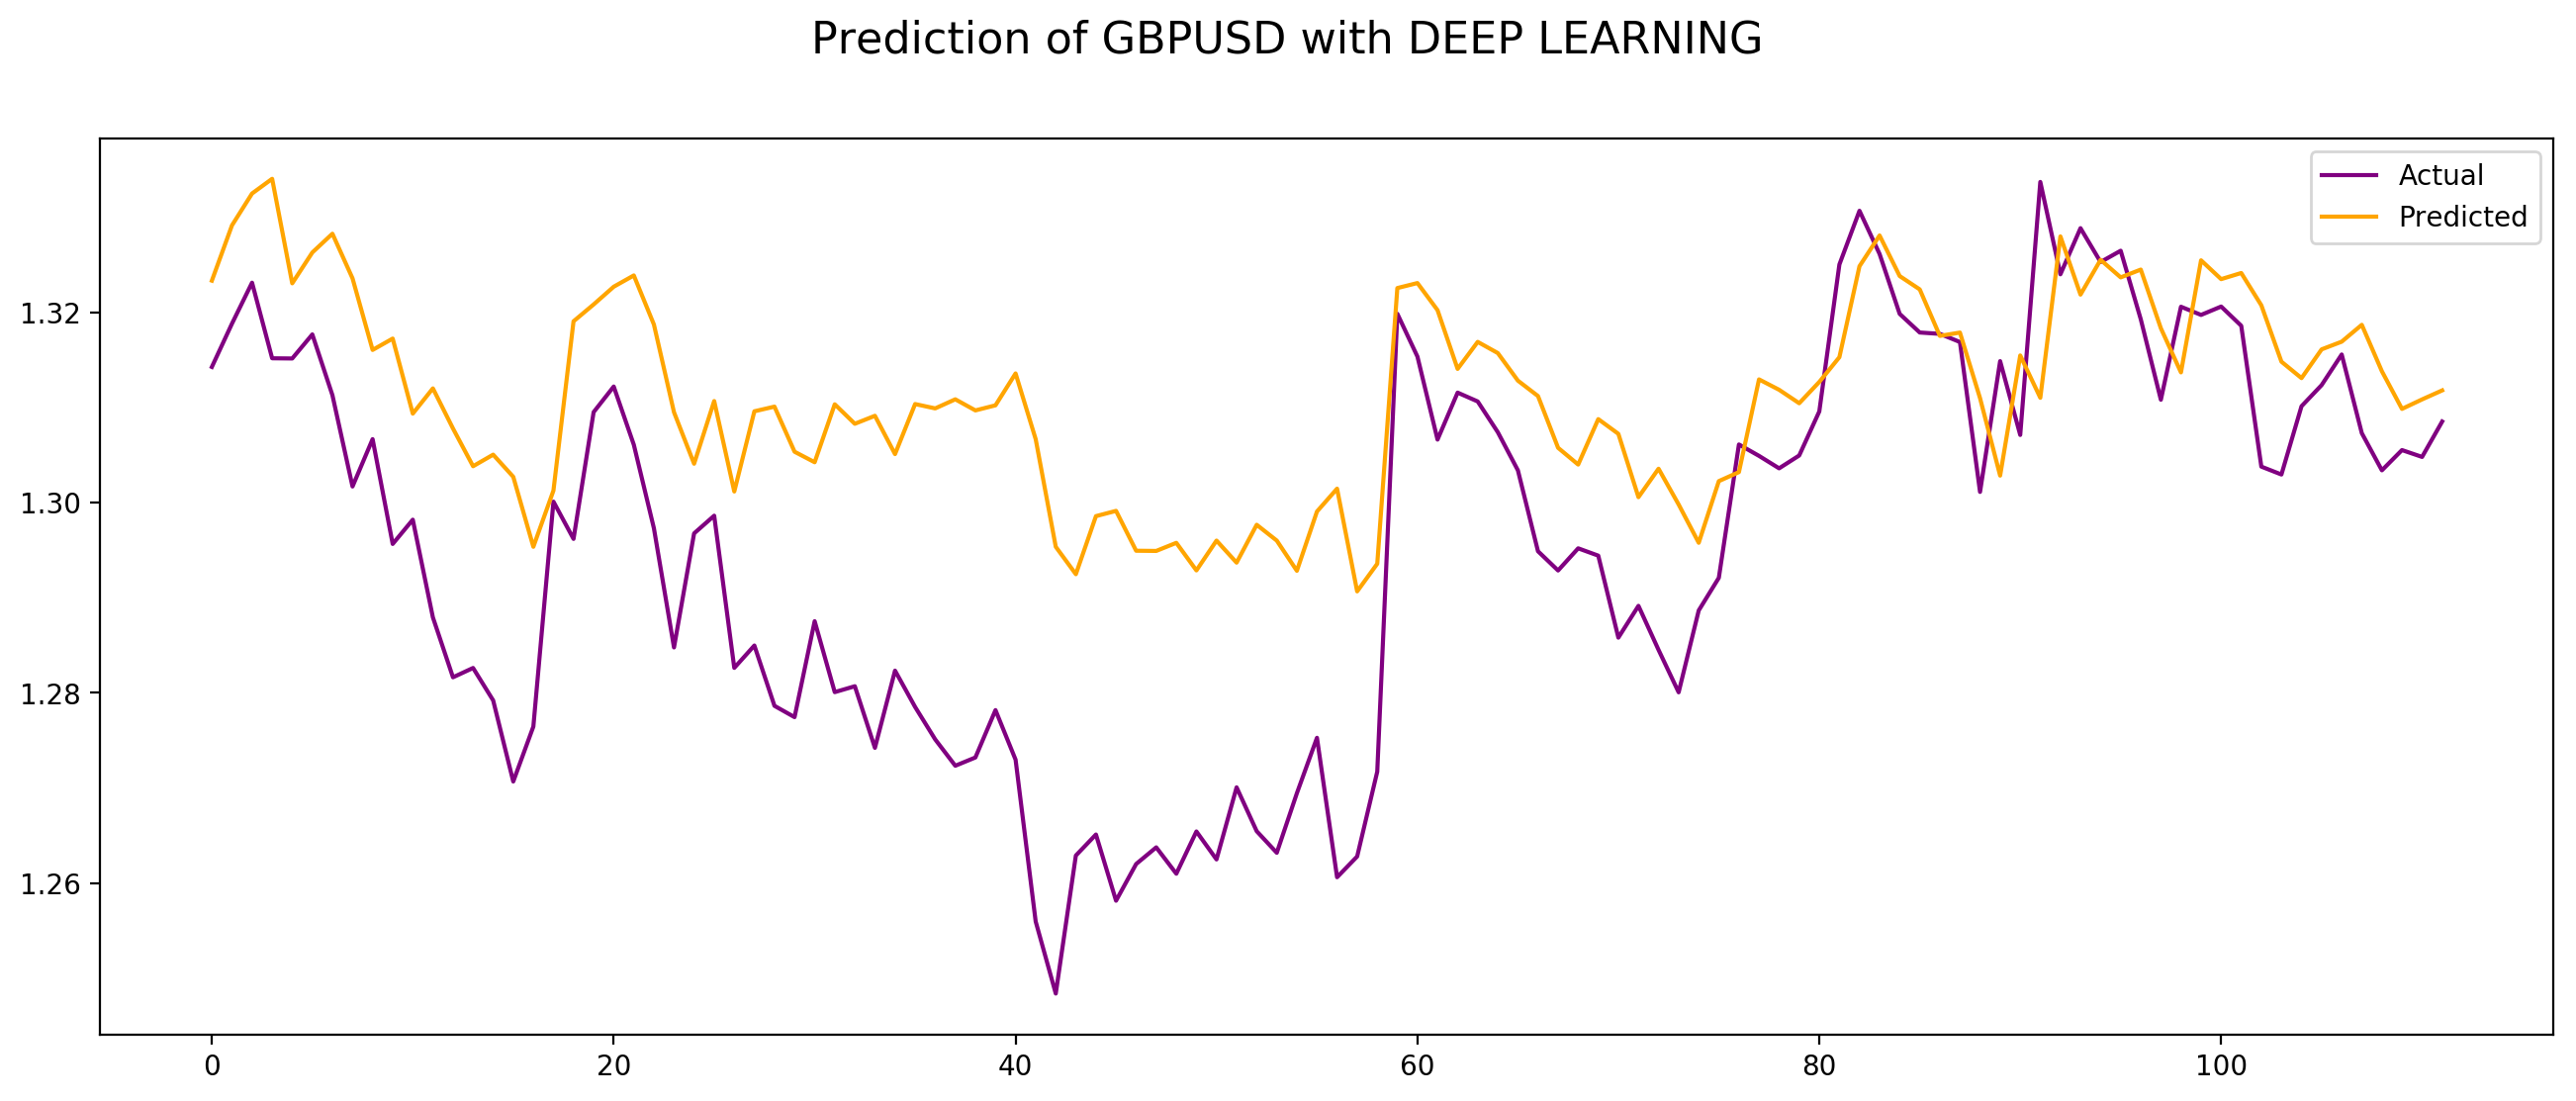

In [107]:
plt.figure(figsize=(16,6),dpi=200)
plt.suptitle('Prediction of GBPUSD with DEEP LEARNING',fontsize=16)
plt.plot(resultats['Close'],color='purple',label='Actual')
plt.plot(resultats['Predictions'],color='orange',label='Predicted')
plt.legend()
plt.show()

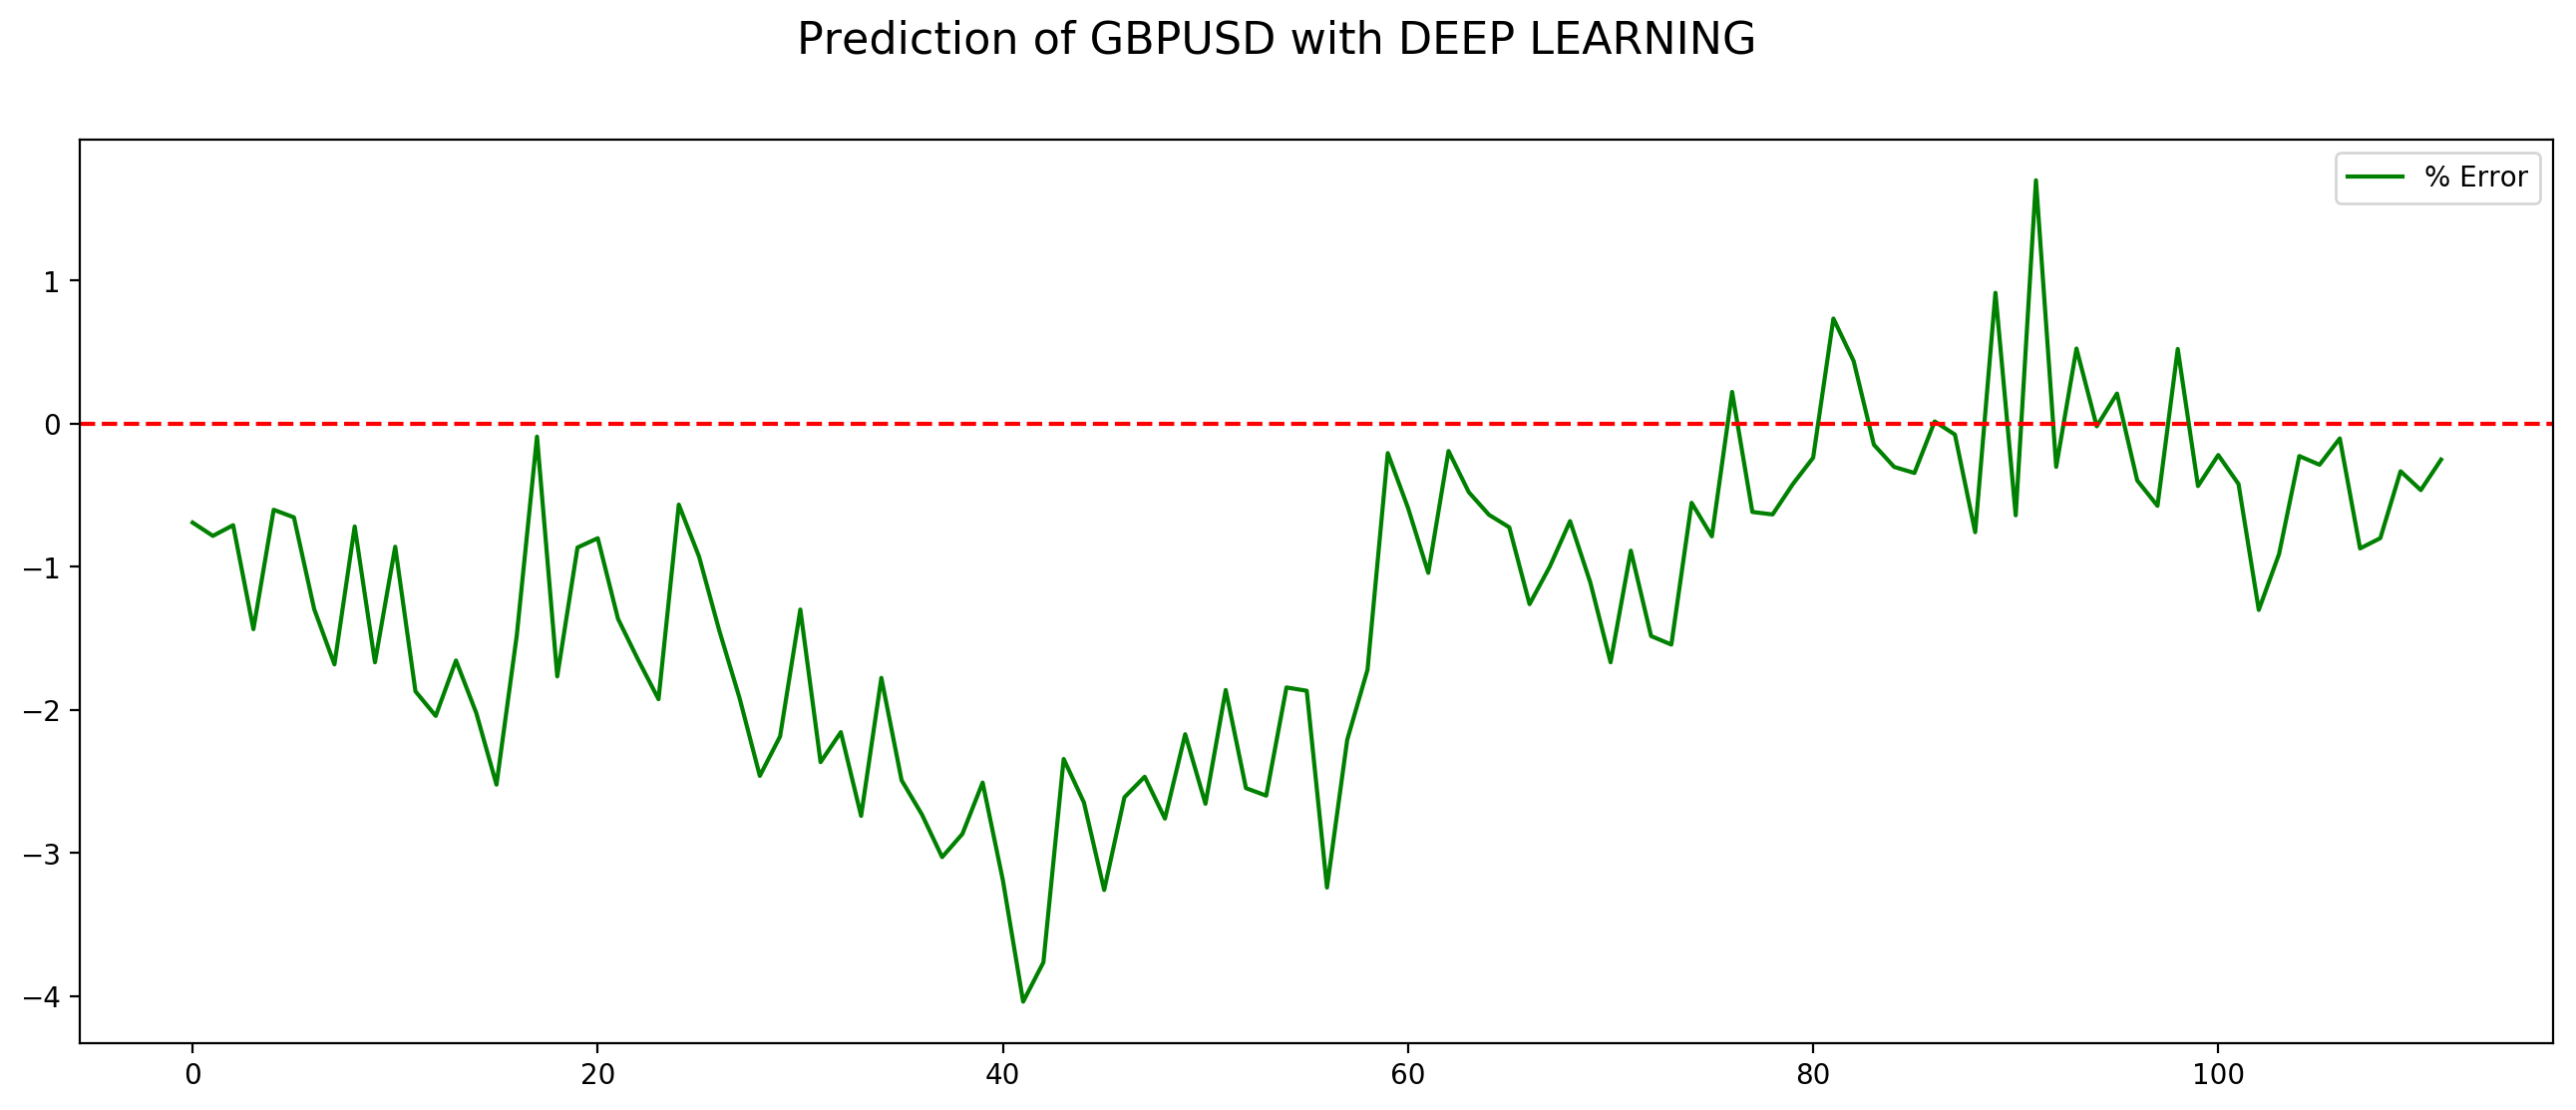

In [108]:
plt.figure(figsize=(16,6),dpi=200)
plt.suptitle('Prediction of GBPUSD with DEEP LEARNING',fontsize=16)
plt.plot(resultats['% Error'],color='g',label='% Error')
plt.axhline(y=0,linestyle='--',color='r')
plt.legend()
plt.show()

In [109]:
yhat = model.predict(np.array([[1.24927,21.76]]), verbose=1)

1/1 [==============================] - 0s 498us/step


In [110]:
yhat

array([[1.2680655]], dtype=float32)